# **Clima Marciano**
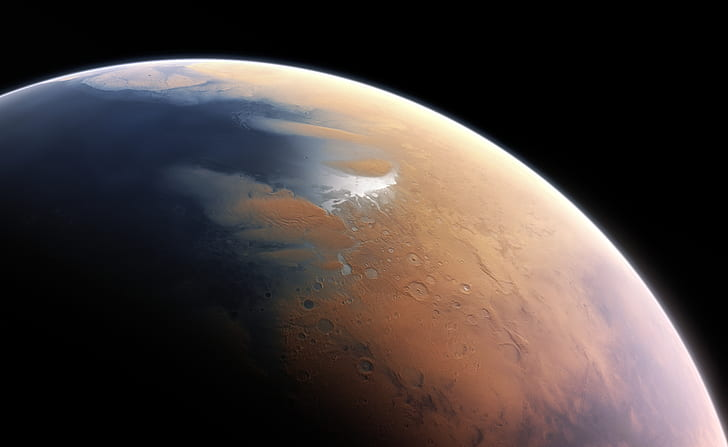

## Introducción

**Los datos fueron obtenidos de https://www.kaggle.com/datasets/imkrkannan/mars-weather-data**

Marte ha sido objeto de gran interés científico debido a su potencial para albergar vida. El estudio del clima marciano desempeña un papel crucial en la comprensión de la habitabilidad y los procesos atmosféricos en este planeta vecino. La misión del rover Curiosity de la NASA ha proporcionado valiosos datos sobre la temperatura y la presión en la superficie marciana, permitiéndonos profundizar en el conocimiento de su clima y las variaciones estacionales.

El rover Curiosity aterrizó en Marte el 6 de agosto de 2012 en el cráter Gale **[1]**, una vasta depresión con una montaña central conocida como el Monte Sharp. Desde su aterrizaje, Curiosity ha recopilado una gran cantidad de datos científicos, incluidas mediciones de temperatura y presión atmosférica.

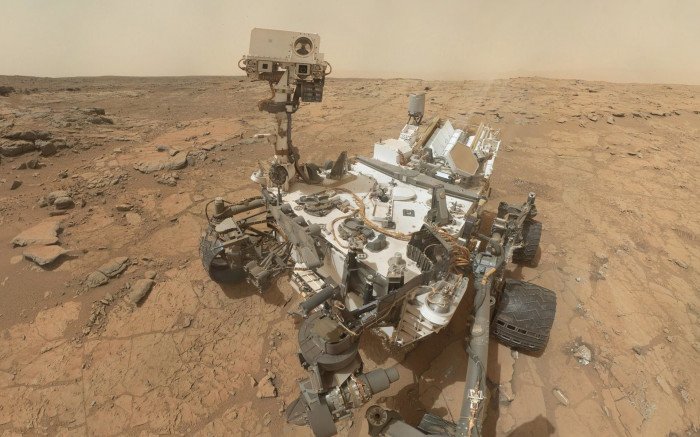

El instrumento REMS (Rover Environmental Monitoring Station) a bordo de Curiosity es especialmente relevante para el estudio del clima. REMS incluye sensores que miden la temperatura del aire, la presión, la humedad relativa, la velocidad y dirección del viento, y la radiación ultravioleta en la superficie de Marte.

A diferencia de la Tierra, donde usamos el concepto de días, meses y años para medir el tiempo, en Marte se utiliza el concepto de soles. Un sol es equivalente a un día marciano y dura aproximadamente 24 horas, 39 minutos y 35 segundos. Además, el calendario marciano se divide en estaciones, al igual que en la Tierra, con primavera, verano, otoño e invierno, las cuales se pueden medir según la longitud solar (ls, que es la posición del sol respecto a la eclíptica en grados) y se miden como **[2]**:

1. Primavera  si ls está ente 0 y 90.

2. Verano si ls está ente 90 y 180.

3. Otoño si ls está entre 180 y 270.

4. Invierno si ls está ente 270 y 360.

Así, es importarte hacer notar que los siguientes puntos deben tomarse en cuenta durante la elaboración de este proyecto:

* Se sabe que existe un claro acoplamiento entre el polvo atmosférico y la presión atmosférica. **[3]**

* La presión en Marte presenta variaciones estacionales debido a la condensación y sublimación de CO2 en
las regiones polares de Marte antes del invierno. **[4]**

* Las oscilaciones climáticas de presión presentan una desviación respecto a la distribución normal en los valores extremos, pero se comportan como una normal cerca de la media. **[4]**

**Propósito**

El objetivo de este análisis de datos es estudiar las variaciones climáticas entre las estaciones en Marte utilizando los datos recopilados por el rover Curiosity. Específicamente, se busca investigar si existe una disminución significativa en la presión atmosférica durante los años de estudio registrados. La hipótesis planteada es que la presión atmosférica ha descendido considerablemente durante los años de estudio en Marte. Esta hipótesis se fundamenta en la observación y análisis preliminar de los datos recopilados por el rover Curiosity, que sugieren **una tendencia descendente en la presión atmosférica a través de los años y no solo entre estaciones**. El análisis estadístico de estos datos permitirá evaluar la significancia de esta hipótesis y obtener una comprensión más profunda de los patrones climáticos en Marte, así como la descripción mediante estadística básica sobre como es la temperatura de un día típico en cada una de las estaciones del clima marciano.

El estudio del clima en Marte no solo nos ayuda a comprender mejor nuestro vecino planetario, sino que también nos brinda información valiosa para futuras misiones espaciales y exploraciones del sistema solar. 

## Resumen

*   Análisis de datos sobre el clima de Marte.

*   Comparación de temperatura y presión atmosférica entre estaciones.

*   Hipótesis nula (H0): No hay una disminución significativa de la presión a lo largo de los años.

*   Hipótesis alternativa (Ha): Hay una disminución significativa de la presión a lo largo de los años.



El archivo de datos contiene las siguientes variables:

* id Numeración de mediciones realizadas.	

* terrestrial_date	 Fecha terrestre.

* sol Días en Marte.

* ls Longitud solar (posición solar en la eclíptica en grados).

* month	Mes marciano de registro.

* min_temp Temperatura mínima registrada durante un sol en °C.

* max_temp Temperatura máxima registrada durante un sol °C.
	
* pressure presión atmosférica en Pa.

* wind_speed	Rapidez del viento registrada.

* atmo_opacity Opacidad del cielo clasificada en soleado, tormenta de polvo.


## Exploración

Primero se importan todas las librerías necesarias para el análisis y se lee el archivo de datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats

# lectura del archivo csv
data = pd.read_csv('mars-weather.csv')

# Visualizar las primeras 5 filas del archivo
data.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


Notamos que la variable wind_speed tiene algunos valores faltantes, además, la variable atmo_opacity parece guardar el estado del tiempo en un sol particular, por lo que es necesario buscar las coincidencias únicas de categoría, así como revisar que wind_speed no sea una variable vacía.

In [ ]:
data['atmo_opacity'].unique()

array(['Sunny', '--'], dtype=object)

In [ ]:
data['wind_speed'].unique()

array([nan])

In [ ]:
data['month'].unique()

array(['Month 5', 'Month 4', 'Month 3', 'Month 2', 'Month 1', 'Month 12',
       'Month 11', 'Month 10', 'Month 9', 'Month 8', 'Month 7', 'Month 6'],
      dtype=object)

Se ha encontrado que tanto la variable atmo como wind son irrelevantes para este proyecto debido a la falta de valores, además, la numeración mensual es repetitiva, es decir, se modula cada 12 meses, repitiendo la numeración luego del mes 12.

## Limpieza

Ahora, además de las columnas vacías, hay que buscar valores faltantes en la temperatura y la presión:

In [ ]:
for column in data:
    null_count = data[column].isnull().sum()
    print(f"{column}: {null_count}")

id: 0
terrestrial_date: 0
sol: 0
ls: 0
month: 0
min_temp: 27
max_temp: 27
pressure: 27
wind_speed: 1894
atmo_opacity: 0


Reafirmamos que wind_speed es una variable inutilizable, además, los valores faltantes de temperatura y presión parecen coincidir y son irrelevantes para la muestra, por lo que dejaremos fuera las columnas atmo y wind, quitando los valores nulos de temperatura y presión:

In [ ]:
# Removemos las columnas
data = data.drop(['wind_speed','atmo_opacity'], axis=1)
data = data.dropna(subset=['pressure'])
# Guardamos el data frame limpio en un nuevo csv
data.to_csv('clean.csv', index=False)


## Análisis y Resultados

Con los datos limpios, es momento de analizas sus características básicas

### Características

In [ ]:
clean=pd.read_csv('clean.csv')
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   object 
 5   min_temp          1867 non-null   float64
 6   max_temp          1867 non-null   float64
 7   pressure          1867 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 116.8+ KB


Notamos que es posible evaluar los valores de temperatura y presión respecto al mes, al sol (días) y respecto a la posición orbital (ls).

In [ ]:
clean.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1867.0,955.551152,545.048507,2.0,489.5,959.0,1425.5,1895.0
sol,1867.0,1015.670059,565.342298,10.0,546.5,1028.0,1505.5,1977.0
ls,1867.0,168.865024,105.599153,0.0,78.0,160.0,257.5,359.0
min_temp,1867.0,-76.121050,5.504098,-90.0,-80.0,-76.0,-72.0,-62.0
max_temp,1867.0,-12.510445,10.699454,-35.0,-23.0,-11.0,-3.0,11.0
pressure,1867.0,841.066417,54.253226,727.0,800.0,853.0,883.0,925.0


Por supuesto, la variable id no tiene un significado estadístico, pero es importante notar que la presión tiene una distribución cargada hacia la derecha. 

Ahora, hay que segmentar los datos según la estación:

In [ ]:
def classify_season(ls):
    if 0 <= ls <= 89:
        return 'Primavera'
    elif 90 <= ls <= 179:
        return 'Verano'
    elif 180 <= ls <= 269:
        return 'Otoño'
    elif 270 <= ls <= 360 or 0 <= ls <= 9:
        return 'Invierno'
    else:
        return 'Unknown'

# Aplicamos el filtro para clasificar las variables por estación

clean['season'] = clean['ls'].apply(classify_season)

clean.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,season
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,Verano
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,Verano
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,Verano
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,Verano
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,Verano


Hacemos lo mismo para cada año, haciendo notar que los años marcianos se registran desde 1955 (https://www.planetary.org/articles/mars-calendar):

In [ ]:
# Definimos las condiciones para segmentar los soles en años
conditions = [
    (clean['sol'].between(0, 350)),
    (clean['sol'].between(351, 1018)),
    (clean['sol'].between(1019, 1687)),
    (clean['sol'].between(1688, 2356))
]
values = ['Year 31', 'Year 32', 'Year 33', 'Year 34']

# Seleccionamos los valores para aplicar la condición
clean['Year'] = np.select(conditions, values)

clean.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,season,Year
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,Verano,Year 34
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,Verano,Year 34
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,Verano,Year 34
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,Verano,Year 34
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,Verano,Year 34


### Gráficas

In [ ]:
# Elegimos algunos colores más limpios
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

fig = make_subplots(rows=1, cols=3)

# Presión
fig.add_trace(
    go.Histogram(x=clean["pressure"], nbinsx=20, marker=dict(color=colors[0]), name="Pressure"),
    row=1,
    col=1
)

# Min Temp
fig.add_trace(
    go.Histogram(x=clean["min_temp"], nbinsx=20, marker=dict(color=colors[1]), name="Min Temp"),
    row=1,
    col=2
)

# Max Temp
fig.add_trace(
    go.Histogram(x=clean["max_temp"], nbinsx=20, marker=dict(color=colors[2]), name="Max Temp"),
    row=1,
    col=3
)

# Actualización
fig.update_layout(
    title="Histogramas de Presión, Min Temp y Max Temp",
    xaxis=dict(title="Value"),
    yaxis=dict(title="Count"),
    showlegend=True,
    barmode="overlay",
)

fig.show()


De los histogramas podemos notar que efectivamente hay una inclinación en los datos de la presión atmosférica, sin embargo, parece seguir la tendencia "casi normal" centrada en valores cercanos a la media, del mismo modo, las temperaturas parecen obedecer este comportamiento.

In [ ]:
season_pressure_counts = clean['season'].value_counts()

# Creamos un pie chart para visualizar la cantidad de datos que existen por estación
fig1 = go.Figure(data=go.Pie(labels=season_pressure_counts.index, values=season_pressure_counts.values))
fig1.update_layout(title='Conteo de valores de presión por estación')
fig1.show()

Se percibe un balance entre la cantidad de datos, lo que permite que sea posible evaluar los cambios entre estaciones sin tener que encontrar coincidencias temporales.

In [ ]:
year_pressure_counts = clean['Year'].value_counts()

fig2 = go.Figure(data=go.Pie(labels=year_pressure_counts.index, values=year_pressure_counts.values))
fig2.update_layout(title='Conteo de valores de presión por año')
fig2.show()

Tenemos balance entre el año 32 y el año 33, del mismo modo que entre el año 31 y el año 34, sin embargo, no podemos concluir que los datos fueran tomados durante la misma época cada año, por lo que para poder realizar un análisis significativo será necesario realizar una inspección al comportamiento de la presión a lo largo de los valores de ls por cada año.

In [ ]:
#Preparación para el violin plot incluyendo los datos individuales

fig3 = px.violin(clean, x='season', y='max_temp', color='season',
                box=True, points="all", hover_data=clean.columns,
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig3.update_layout(title='Temperatura máxima por estación', xaxis_title='Estación', yaxis_title='Temperatura Máxima (°C)')

fig3.show()

Puede parecer alarmante, pero, ¿por qué el verano es más frío que el invierno? Bueno, esto es debido a que el cráter Gale se encuentra en el hemisferio sur de Marte y, tal y como ocurre en la Tierra, la inclinación de Marte provoca que los hemisferios sur y norte presenten climas inversos por temporada.

Analizando la gráfica se rescatan los siguientes puntos:

* En primavera, alrededor del 25% de los valores de temperatura máxima son inferiores a -27°C (Q1), el 50% son inferiores a -23°C (mediana) y el 75% son inferiores a -18°C (Q3). Esto sugiere que la distribución de la temperatura en primavera es ligeramente más fría que en verano, con un mayor porcentaje de valores dentro de estos cuartiles.

* En verano, aproximadamente el 25% de los valores de temperatura máxima son inferiores a -25°C (Q1), el 50% son inferiores a -19°C (mediana) y el 75% son inferiores a -11°C (Q3). Esto indica que una parte importante de la distribución de la temperatura en verano se concentra entre estos cuartiles.

* En otoño, aproximadamente el 25% de los valores de temperatura máxima son inferiores a -4°C (Q1), el 50% son inferiores a -1°C (mediana) y el 75% son inferiores a 2°C (Q3). Esto sugiere que la distribución de la temperatura en otoño es relativamente más suave en comparación con el invierno, con un mayor porcentaje de valores dentro de estos cuartiles.

* En invierno, aproximadamente el 25% de los valores de temperatura máxima son inferiores a -8°C (Q1), el 50% son inferiores a -5°C (mediana) y el 75% son inferiores a -3°C (Q3). Esto indica que una mayoría significativa de la distribución de la temperatura en invierno se agrupa entre estos cuartiles, observándose menos valores extremos.

A partir de estos resultados podemos observar qie el verano presenta la temperatura media más baja (-19°C) entre las estaciones, seguido de la primavera (-23°C), el invierno (-5°C) y el otoño (-1°C). El rango intercuartílico (IQR) proporciona información sobre la dispersión de los datos dentro de cada estación. El verano tiene el IQR más amplio, lo que indica una mayor variabilidad de las temperaturas máximas durante esta estación. 

Adicionalmente, el otoño tiene un rango más estrecho (-13°C a 11°C), lo que sugiere una variabilidad relativamente menor de las temperaturas máximas.

In [ ]:
fig4 = px.violin(clean, x='season', y='min_temp', color='season',
                box=True, points="all", hover_data=clean.columns,
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig4.update_layout(title='Temperatura mínima por estación', xaxis_title='Estación', yaxis_title='Temperatura Mínima (°C)')

fig4.show()

Nuevamente notamos que el verano presenta una mayor dispersión con valores concentrados a una menor temperatura que el invierno. Además, en ambos casos, el verano parece presentar un clima más variable, aunque no parece ser significativo. De manera más cuantificable:

* En primavera, la distribución de la temperatura mínima muestra que aproximadamente el 25% de los valores están por debajo de -82°C (Q1), el 50% están por debajo de -80°C (mediana), y el 75% están por debajo de -78°C (Q3). La temperatura mínima registrada es de -90°C, y hay un valor atípico a -62°C. Si excluimos el outlier, la temperatura mínima máxima sin el valor atípico es de -74°C. Esto indica que la mayoría de las temperaturas mínimas durante la primavera están estrechamente agrupadas entre -82°C y -78°C, con unos pocos outliers.

* En verano el 25% de los valores de temperatura mínima son inferiores a -83°C (Q1), el 50% son inferiores a -79°C (mediana) y el 75% son inferiores a -76°C (Q3). La temperatura mínima registrada es de -89°C, y la máxima de -71°C. Estas estadísticas sugieren que las temperaturas mínimas durante el verano son relativamente más altas en comparación con la primavera, con un rango de variabilidad un poco más grande.

* Para el otoño aproximadamente el 25% de los valores son inferiores a -72°C (Q1), el 50% son inferiores a -70°C (mediana), y el 75% son inferiores a -68°C (Q3). La temperatura mínima registrada es de -78°C, y la máxima de -63°C. Estos resultados indican que las temperaturas mínimas durante el otoño son más altas en comparación con la primavera y el verano, lo que implica un clima relativamente más soportable durante esta estación.

* En invierno el 25% de los valores de temperatura mínima son inferiores a -75°C (Q1), el 50% son inferiores a -73°C (mediana) y el 75% son inferiores a -71°C (Q3). La temperatura mínima registrada es de -81°C, y la máxima de -66°C. Estas estadísticas revelan que las temperaturas mínimas durante el invierno son más bajas en comparación con el otoño y más altas que el verano y la primavera.

Pero, si las temperaturas tienen tanta variación estacional, entonces, ¿cómo es la temperatura sol a sol en Marte?

In [ ]:
fig5 = px.scatter(clean, x='sol', y='max_temp', color='season', title='Maximum and Minimum Temperatures by Season',
                 labels={'sol': 'Sol', 'max_temp': 'Temperature (°C)'}, color_discrete_sequence=px.colors.qualitative.Pastel)

fig5.add_trace(px.scatter(clean, x='sol', y='min_temp', color='season', color_discrete_sequence=px.colors.qualitative.Pastel).data[0])
fig5.add_trace(px.scatter(clean, x='sol', y='min_temp', color='season', color_discrete_sequence=px.colors.qualitative.Pastel).data[1])
fig5.add_trace(px.scatter(clean, x='sol', y='min_temp', color='season', color_discrete_sequence=px.colors.qualitative.Pastel).data[2])
fig5.add_trace(px.scatter(clean, x='sol', y='min_temp', color='season', color_discrete_sequence=px.colors.qualitative.Pastel).data[3])
fig5.show()

Así, al graficar la temperatura mínima y máxima de cada sol esposible notar que durante la primavera y el verano se encuentran las menores mínimas y máximas temperaturas, además, la variabilidad de la temperatura es inmensa, tomando el sol 760 se rescata que la temperatura máxima ese día fue de 11 °C y la temperatura mínima fue de -70 °C, **¡81 °C de diferencia en un solo día!**

Pero, ¿cuál es la mayor diferencia registrado durante estos años?

In [ ]:
# Encontramos las diferencias de temperatura para cada día
clean['temp_diff'] = clean['max_temp'] - clean['min_temp']

# Encontramos la máxima diferencia
max_temp_diff = clean['temp_diff'].max()

# Encontramos la mínima diferencia
min_temp_diff = clean['temp_diff'].min()

# Encontramos la temporada en la que encontramos la máxima y la mínima diferencia.
season_with_max_diff = clean.loc[clean['temp_diff'] == max_temp_diff, 'season'].values[0]
season_with_min_diff = clean.loc[clean['temp_diff'] == min_temp_diff, 'season'].values[0]

print("La mayor oscilación de temperatura registrado en nuestros datos es:", max_temp_diff)
print("La menor oscilación de temperatura registrado en nuestros datos es:", min_temp_diff)
print("La mayor diferencia de temperatura ocurrió durante el", season_with_max_diff)
print("La mayor diferencia de temperatura ocurrió durante el", season_with_min_diff)

La mayor oscilación de temperatura registrado en nuestros datos es: 85.0
La menor oscilación de temperatura registrado en nuestros datos es: 45.0
La mayor diferencia de temperatura ocurrió durante el Otoño
La mayor diferencia de temperatura ocurrió durante el Primavera


Así, tenemos suficientes indicios de que los próximos habitantes de Marte experimentarán unos otoños extremadamente difíciles.

Además, para poner en perspectiva estos cambios, las mayores diferencias de temperatura en un día en la ciudad de México son de entre 15 y 20 grados.

Ahora, ¿cómo se comporta la presión entre estaciones?

In [ ]:
fig6 = px.violin(clean, x='season', y='pressure', color='season',
                box=True, points="all", hover_data=clean.columns,
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig6.update_layout(title='Presión por estación', xaxis_title='Estación', yaxis_title='Presión (Pa)')

fig6.show()

Es posible notar que la presión presenta diferencias sustanciales ente el verano y el invierno, siendo el otoño la estación con mayor variabilidad de todas, nuevamente, este resultado reafirma los hechos presentados en la introducción, pues es en este mes donde comienzan a ocurrir las concentraciones de CO2 en los polos. Cuantitativamente:

* En primavera, la distribución de la presión muestra que aproximadamente el 25% de los valores son inferiores a 863 Pa (Q1), el 50% son inferiores a 878 Pa (mediana) y el 75% son inferiores a 892 Pa (Q3). La presión mínima registrada es de 820 Pa, y la máxima de 908 Pa. Estas estadísticas indican que la presión durante la primavera presenta un rango relativamente alto, con una ligera asimetría hacia los valores más altos.

* En verano, alrededor del 25% de los valores de presión son inferiores a 742 Pa (Q1), el 50% son inferiores a 756,5 Pa (mediana) y el 75% son inferiores a 795 Pa (Q3). La presión mínima registrada es de 727 Pa, y la máxima de 857 Pa. Estos resultados sugieren que la presión durante el verano es generalmente más baja en comparación con otras estaciones, con un rango de variabilidad relativamente más estrecho.

* En otoño, el 25% de los valores de presión son inferiores a 810 Pa (Q1), el 50% son inferiores a 874 Pa (mediana) y el 75% son inferiores a 908,25 Pa (Q3). La presión mínima registrada es de 751 Pa, y la máxima de 925 Pa. Estas estadísticas revelan una variabilidad alta en los valores de presión durante el otoño, con una notable asimetría hacia valores más altos.

* En invierno, cerca del 25% de los valores de presión son inferiores a 844 Pa (Q1), el 50% son inferiores a 852 Pa (mediana) y el 75% son inferiores a 875,5 Pa (Q3). La presión mínima registrada es de 829 Pa, y la máxima de 917 Pa. Estos resultados indican que la presión durante el invierno presenta un rango moderado, con una distribución relativamente simétrica.

Y, siguiendo con la presión, es momento de investigar la cuestión central del proyecto: el comportamiento de la presión año tras año.

In [ ]:
fig7 = px.scatter(clean, x='ls', y='pressure', color='Year',
                 color_discrete_sequence=px.colors.qualitative.Pastel)

fig7.update_traces(marker=dict(size=4))

fig7.update_layout(title='Solar Longitude vs Pressure by Year',
                  xaxis_title='Solar Longitude (Ls)',
                  yaxis_title='Pressure')

fig7.show()

Es posible darse cuenta que existe una disminución gradual, pero no ordenada, en la presión medida cada año, además, podemos notar un valle entre la longitud 50 y 250. Ahora, además es posible notar que los datos entre el año 31 (en morado) y los del año 34 son incomparables, es decir, los datos disponibles para el año 31 ocurren en una estación distinta a los presentados por el año 34, respecto a los demás, es posible tomar el año 32 y 33 por completo o seccionar alguno de estos para compararlo con el año 31 o el año 34.

In [ ]:
fig = px.scatter(clean, x='ls', y='pressure', color='season',
                 color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(marker=dict(size=4))

fig.update_layout(title='Solar Longitude vs Pressure by Year',
                  xaxis_title='Solar Longitude (Ls)',
                  yaxis_title='Pressure')

fig.show()

Para indagar más sobre la falta de datos, es posible notar que al sustraer (la gráfica es interactiva) el otoño y el invierno, solo se distinguen tres líneas, correspondientes a los años 32, 33 y 34.

In [ ]:
fig8=px.scatter(clean, x='sol', y='pressure', color='season', title='Presión a través de los soles',
                 labels={'sol': 'Sol', 'pressure': 'Presión (Pa)'}, color_discrete_sequence=px.colors.qualitative.Pastel)

fig8.show()


Ahora, sol a sol la presión presenta un comportamiento cíclico con periodo de aproximadamente 670 soles. Ahora, visualmente, es posible notar que durante el pico de primavera (o de otoño) se presenta un decremento en el valor de dicho máximo. Esto reafirma la presencia de un fenómeno de disminución en la presión atmosférica.

In [ ]:
fig9 = px.violin(clean, x='Year', y='pressure', color='Year',
                box=True, points="all", hover_data=clean.columns,
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig9.update_layout(title='Presión por año', xaxis_title='Año', yaxis_title='Presión (Pa)')

fig9.show()

Ahora, es importante señalar que la mediana de todos los años es prácticamente igual (con ligeras diferencias en los años 32 y 33). Además:

* La distribución de la presión para el año 34 indica que aproximadamente el 25% de los valores son inferiores a 799.5 Pa (Q1), el 50% son inferiores a 852 Pa (mediana) y el 75% son inferiores a 872.5 Pa (Q3). La presión mínima registrada es de 727 Pa, y la máxima, de 884 Pa.

* Durante el año 33 alrededor del 25% de los valores de presión son inferiores a 803 Pa (Q1), el 50% son inferiores a 852.5 Pa (mediana) y el 75% son inferiores a 887 Pa (Q3). La presión mínima registrada es de 732 Pa y la máxima de 911 Pa. Estos resultados indican un ligero aumento de la presión en comparación con el año 34, pero el intervalo sigue siendo relativamente similar.

* En el año 32 cerca del 25% de los valores de presión son inferiores a 793.75 Pa (Q1), el 50% son inferiores a 854 Pa (mediana) y el 75% son inferiores a 889.25 Pa (Q3). La presión mínima registrada es de 732 Pa, y la máxima de 925 Pa. Estas estadísticas sugieren una variavilidad más alta de los valores de presión en comparación con los años posteriores.

* En el año 31 el 25% de los valores de presión son inferiores a 813 Pa (Q1), el 50% son inferiores a 852 Pa (mediana) y el 75% son inferiores a 888 Pa (Q3). La presión mínima registrada es de 732 Pa y la máxima de 925 Pa. Estos resultados indican una ligera disminución de la presión en comparación con el año 32, pero el intervalo general se mantiene constante.

El análisis de los cuartiles y el rango de los valores de presión a lo largo de los años proporciona información valiosa sobre las variaciones temporales de la presión atmosférica en el ecuador sur de Marte. Del Año 34 al Año 31, observamos un valor medio de presión constante de aproximadamente 852 Pa. Sin embargo, existen diferencias notables en los cuartiles y el rango, lo que indica algunas variaciones cuya tendencia es decreciente al avanzar de año en la distribución de los valores de presión.

Comparando el año 34 con el año 31, se observa una disminución del cuartil inferior (Q1) de 799.5 Pa a 813 Pa, lo que sugiere un desplazamiento hacia presiones más bajas. El cuartil superior (Q3) también muestra un ligero descenso, de 872.5 Pa a 888 Pa. El rango se mantiene relativamente estable, lo que indica que, aunque hay algunas variaciones en la presión, no parecen ser sustanciales, sin embargo, esto puede deberse al desfase entre los datos encontrada anteriormente.

Además, comparando el año 33 con el 32, se observa un ligero aumento en el cuartil inferior (Q1), que pasa de 803 Pa a 793.75 Pa, lo que indica un desplazamiento hacia presiones más elevadas al regresar sobre los años. El cuartil superior (Q3) muestra una tendencia similar, aumentando de 887 Pa a 889.25 Pa. El rango se amplía, con el Año 32 exhibiendo una presión máxima más alta de 925 Pa comparada con la máxima del Año 33 de 911 Pa.

Los años 31 y 33 muestran sutiles diferencias en la distribución y la tendencia central de los valores de presión. Aunque ambos años presentan rangos comparables, el Año 31 muestra una distribución ligeramente más amplia y una presión máxima más alta en comparación con el Año 33. Estos resultados sugieren posibles variaciones temporales en la presión atmosférica en el ecuador sur de Marte y justifican una investigación más profunda para comprender los factores subyacentes que impulsan estas fluctuaciones.

## Prueba formal de hipótesis

Ahora, si bien hemos reunido suficientes datos para identificar algunos procesos importantes del clima marciano, es necesario ir más allá con la diferencia entre la presión registrada cada año, puesto que los datos hasta el momento revelan tendencias opuestas respecto a este supuesto. 

Ahora, siguiendo que los datos siguen una distrubución "cercana" a la normal, es posible segmentar los valores de la presión según el año y, por supuesto, los datos se tomaron de manera aleatoria y la cantidad de datos es suficiente entre las muestras.

In [ ]:
year_31_data = clean[(clean['Year'] == 'Year 32') & (clean['pressure']) & (clean['pressure']) & (clean['ls'] < 135)]['pressure']
year_33_data = clean[(clean['Year'] == 'Year 34') & (clean['pressure']) & (clean['pressure']) & (clean['ls'] < 135)]['pressure']

Ahora, es útil tener alguna reresentación gráfica de la distribución de los datos respecto a la normal, para esto es posible usar un Q-Q plot:

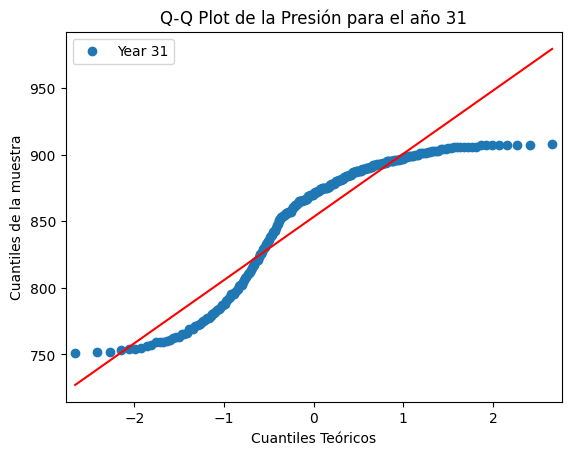

In [ ]:
# Q-Q plots para los años 31 y 33
sm.qqplot(year_31_data, line='s', label='Year 31')

plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la muestra')
plt.legend()

plt.title('Q-Q Plot de la Presión para el año 31')

plt.show()

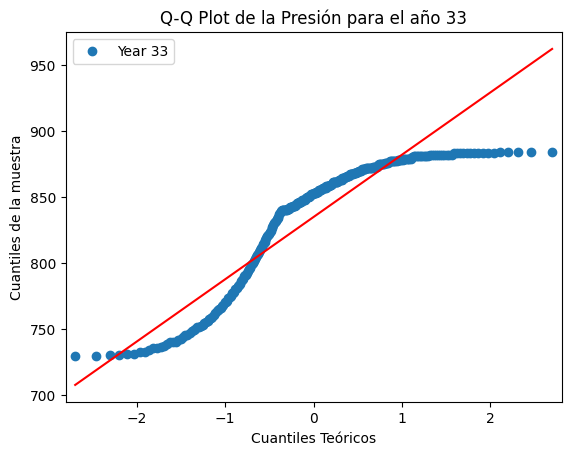

In [ ]:
sm.qqplot(year_33_data, line='s', label='Year 33')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la muestra')
plt.legend()

plt.title('Q-Q Plot de la Presión para el año 33')

plt.show()

Es notorio que los datos tienen una dispersión menor a la esperada por una normal, sin embargo, esto es justo lo que se espera de esta clase de datos, pues vemos que hacia el centro de la distribución se presenta una acumulación de los datos, indicando que la muestra se acerca a la normal entre más cerca de la media se encuentre.

Luego, tenemos que comparar la cantidad de datos en cada conjunto creado.

In [ ]:
print('La cantidad de datos para el año 31 es:',year_31_data.value_counts().sum())
print('La cantidad de datos para el año 33 es:',year_33_data.value_counts().sum())

La cantidad de datos para el año 31 es: 255
La cantidad de datos para el año 33 es: 286


Además, podemos evaluar la diferencia entre las varianzas:

In [ ]:
from scipy.stats import levene, bartlett

# Assuming you have two groups: group1 and group2
statistic_levene, p_value_levene = levene(year_31_data, year_33_data)
statistic_bartlett, p_value_bartlett = bartlett(year_31_data,year_33_data)

# Interpret the results
if p_value_levene > 0.05:
    print("Las varianzas son aproximadamente iguales (Levene's test)")
else:
    print("Las varianzas son significativamente distintas (Levene's test)")

if p_value_bartlett > 0.05:
    print("Las varianzas son aproximadamente iguales (Bartlett's test)")
else:
    print("Las varianzas son significativamente distintas (Bartlett's test)")

Las varianzas son aproximadamente iguales (Levene's test)
Las varianzas son aproximadamente iguales (Bartlett's test)


Lo que indica que las muestras son susceptiles de comparación mediante un t-test.

Finalmente podemos medir algunas de las características importantes de las muestras y evaluar el t-test:

In [ ]:
# Desviación estándar
year_31_std = np.std(year_31_data)
year_33_std = np.std(year_33_data)


year_31_mean = np.mean(year_31_data)
year_33_mean = np.mean(year_33_data)

# Cohens d
pooled_std = np.sqrt(((len(year_31_data) - 1) * year_31_std ** 2 + (len(year_33_data) - 1) * year_33_std ** 2) / (len(year_31_data) + len(year_33_data) - 2))
effect_size = (year_31_mean - year_33_mean) / pooled_std

print("Year 31 Standard Deviation:", year_31_std)
print("Year 33 Standard Deviation:", year_33_std)
print("Year 31 Mean:", year_31_mean)
print("Year 3 Mean:", year_33_mean)
print("Effect Size (Cohen's d):", effect_size)

# t-test
t_statistic, p_value = stats.ttest_ind(year_31_data, year_33_data, equal_var=False)


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Year 31 Standard Deviation: 47.41690625553925
Year 33 Standard Deviation: 47.2561299328006
Year 31 Mean: 853.2117647058824
Year 3 Mean: 834.7832167832167
Effect Size (Cohen's d): 0.38934679385900606
T-Statistic: 4.511247684817343
P-Value: 7.938218940177463e-06


Podemos interpretar estos resultados de la siguiente manera:

* En este caso, la desviación estándar es similar tanto para el año 31 como para el 33, lo que indica que los puntos de datos se dispersan en torno a la media en un grado similar en ambos años.

* El año 31 tiene una media más alta (853.21) que el año 33 (834.78). Esto sugiere que los valores de presión del año 31 son ligeramente superiores a los del año 33.

* En este caso, el tamaño del efecto es 0.39, lo que indica un tamaño del efecto moderado. Esto significa que la diferencia entre el año 31 y el año 33 es significativa y no sólo el resultado de una variación aleatoria.

* En este caso, el estadístico t es 4.51, lo que sugiere una diferencia significativa entre las medias de los dos años.

* El valor p indica la probabilidad de observar la diferencia obtenida (o una diferencia más extrema) entre las medias sólo por azar, suponiendo la hipótesis nula de ausencia de diferencia. En este caso, el valor p es muy pequeño (7.94E-06), lo que indica una fuerte evidencia contra la hipótesis nula. Esto significa que la diferencia observada en la presión entre el año 31 y el año 33 es estadísticamente significativa. 

**En conclusión, basándonos en el análisis de la prueba t, tenemos pruebas contundentes que sugieren que existe una diferencia significativa en los valores de presión entre el año 31 y el año 33. Los resultados permiten rechazar la hipótesis nula y apoyan la idea de que estos dos años presentan características de presión distintas y que esta diferencia no es el resultado de fluctuaciones aleatorias.**

Sin embargo, dejando de asumir la normalidad de los datos (por supuesto, esta distribución se aleja de la normal, pero es habitual tomar pruebas que lo asumen cuando se trata de la presión atmosférica al tener una gran cantidad de datos) es posible incrementar lo robusto de nuestras evidencias, para esto es importante asumir la no normalidad y aplicar la siguiente prueba:

In [ ]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
statistic, p_value = mannwhitneyu(year_31_data, year_33_data)

print("Mann-Whitney U test:")
print("U-statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test:
U-statistic: 47293.5
P-value: 2.4250319335683124e-09


Según los resultados de la prueba U de Mann-Whitney, el estadístico U es 47293.5 y el valor p es 2.42E-09.

En este caso el estadístico U más alto indica una mayor suma de rangos para un grupo en comparación con el otro, lo que significa que uno de los grupos de datos tiene valores más altos que el otro.

El valor p representa la probabilidad de observar una diferencia tan extrema como la observada, suponiendo la hipótesis nula de que no hay diferencia entre los grupos. En este caso, el valor p es muy pequeño (2.43E-09), lo que es significativamente inferior al nivel de significancia convencional de 0.05. Por lo tanto, podemos concluir que existe una diferencia muy significativa entre los dos grupos en cuanto a sus valores de presión.

**Basándonos en los resultados de la prueba U de Mann-Whitney, tenemos pruebas sólidas para rechazar la hipótesis nula y concluir que existe una diferencia estadísticamente importante en los valores de presión entre los dos años y, por lo tanto, sin asumir la normalidad, nos proporciona pruebas robustas para rechazar la hipótesis nula y apoya la conclusión de que existe una diferencia significativa en la presión entre el Año 31 y el Año 33.**

## Conclusiones

**Tras analizar los datos de presión recogidos por el rover Curiosity en el cráter Gale de Marte se ha logrado rechazar la hipótesis nula del no descenso de presión anual y se ha encontrado la evidencia suficiente para reslpaldar la hipótesis de que la presión registrada por el Curiosity presentó una disminución año tras año**, además, se ha encontrado que los valores de presión durante las estaciones otoñales presentan un alto grado de variabilidad. Los datos revelan que la presión atmosférica en Marte tiende a ser menor durante el verano en comparación con las otras estaciones. Aunado a esto, el análisis de las medidas de presión indica un comportamiento cíclico con una periodicidad de aproximadamente 670 soles. Este patrón cíclico sugiere la presencia de variaciones recurrentes de la presión atmosférica, que podrían estar influidas por factores climáticos estacionales o efectos a largo plazo. 

Si bien, en la literatura se han mencionado diversas causas por las que la presión parece variar tanto, las condiciones propias del cráter Gale, aunadas a diversos inconvenientes con el polovo marciano, han llevado a pensar que una posible causa para la depresión continua anual de la presión se deba únicamente a descalibraciones en el instrumento REMS. Sin embargo, una cantidad mayor de datos, así como pruebas humanas en el sitio son necesarias.

Adicionalmente, los resultados del t-test indican una disminución significativa de la presión a lo largo de los años, apoyada por un estadístico T de 4.51 y un valor P de 7.94E-06, además, la prueba U de Mann-Whitney también apoya la hipótesis alternativa, revelando una diferencia significativa en la presión entre los dos grupos comparados obteniendo un estadístico U igual a 47293.5 y un valor P de 2,43E-09. Estos resultados nos permiten rechazar la hipótesis nula y concluir que hay pruebas sólidas que sugieren un descenso significativo de la presión atmosférica.

Por otra parte, los patrones de temperatura en Marte muestran variaciones distintivas a lo largo de las diferentes estaciones. El amplio rango de temperaturas máximas observado durante el verano indica un entorno dinámico y potencialmente volátil. El otoño destaca por las temperaturas máximas más elevadas, lo que sugiere unas condiciones relativamente más cálidas durante esta estación. Por el contrario, la primavera registra las temperaturas mínimas más bajas, lo que indica temperaturas nocturnas más suaves en comparación con otras estaciones. El invierno presenta temperaturas más bajas que el otoño, pero más altas que el verano y la primavera, lo que pone de relieve el singular perfil térmico de esta estación. 

Además, el conjunto de datos revela importantes oscilaciones de temperatura, la mayor de las cuales se registró en 85 °C. Las mayores diferencias de temperatura entre mediciones consecutivas se producen durante las estaciones de otoño y primavera. Esto indica fluctuaciones pronunciadas de la temperatura y subraya la naturaleza siempre cambiante del clima marciano durante estos períodos.

En lo que respecta a la investigación, se ha podido resolver satisfactoriamente la cuestión central, sin emabrgo, la baja calidad de los datos, así como la baja duración del registro (4 años en términos del clima es una fracción de tiempo despreciable) por lo que las opciones se reducen y se compromete el alcance de este proyecto, por lo que se sugiere expandir los datos durante décadas y utilizarlos para generar modelos de predicción climática que sirvan para encontrar la verdadera causa del descenso de la presión atmosférica que me hemos podido comprobar durante este estudio.

## Bibliografía

1. NASA. (2023, 26 de mayo). Where is curiosity? Location Map. NASA. https://mars.nasa.gov/msl/mission/where-is-the-rover/#:~:text=Curiosity%20Rover’s%20Location%3A%20This%20interactive,on%20Aug.%205%2C%202012. 

2. Picqueux, S.; Byrne, S.; Kieffer, H.H.; Titus, T.N.; Hansen, C.J. (2015). "Enumeration of Mars years and seasons since the beginning of telescopic observations". Icarus. 251: 332–338. doi:10.1016/j.icarus.2014.12.014

3. Harri, A. -M, Genzer, M., Kemppinen, O., 
Kahanpää, H., Gomez-Elvira, J., Rodriguez-Manfredi, J., Haberle, R., Polkko, J., Schmidt, W., Savijärvi, H., Kauhanen, J., Atlaskin, E., Richardson, M., Siili, T., Paton, M., de la, Torre Juarez, Newman, C., Rafkin, S., Lemmon, M. T., Mischna, M., Merikallio, S., Haukka, H., Martin-Torres, J., Zorzano, M. -P, Peinado, V. et al. 2014. "Pressure observations by the Curiosity rover: Initial results: MSL PRESSURE OBSERVATIONS: INITIAL RESULTS." Journal of Geophysical Research. E. Planets. 119 (1):82–92.

4. Haberle, R. M., Clancy, R. T., Forget, F., Smith, M. D., & Zurek, R. W. (Eds.). (2017). Cambridge planetary science: The atmosphere and climate of mars series number 18. doi:10.1017/9781139060172

